# Hawaii - A Climate Analysis And Exploration
### For data between August 23, 2016 - August 23, 2017
---

In [2]:
# Import dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

## Reflect Tables into SQLAlchemy ORM

In [3]:
# Set up query engine. 'echo=True is the default - will keep a log of activities'

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Another way to get table names from SQL-lite
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

## Exploratory Climate Analysis

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Display details of 'measurement' table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# DISPLY number of line items measurement, and remove tuple form
result, = engine.execute('SELECT COUNT(*) FROM measurement').fetchall()[0]
print(result,)

19550


In [13]:
# Display details of 'station' table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# DISPLY number of line items station, and remove tuple form

result, = engine.execute('SELECT COUNT(*) FROM station').fetchall()[0]
print(result,)

9


In [15]:
# FULL INNTER JOIN BOTH THE MEASUREMENT AND STATION TABLE

# engine.execute('SELECT measurement.*, station.name, station.latitude FROM measurement INNER JOIN station ON measurement.station = station.station;').fetchall()
join_result = engine.execute('SELECT * FROM measurement INNER JOIN station ON measurement.station = station.station;').fetchall()
join_result

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.271

In [16]:
# Another way to PERFORM AN INNER JOIN ON THE MEASUREMENT AND STATION TABLES

engine.execute('SELECT measurement.*, station.* FROM measurement, station WHERE measurement.station=station.station;').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.271

In [17]:
# Query last date of the measurement file

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

print(last_date) 

last_date_measurement = dt.date(2017, 8 ,23)

2017-08-23


In [18]:
# Calculate the date 1 year delta of the "last date measurement"

one_year_ago = last_date_measurement - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


2016-08-23
2230


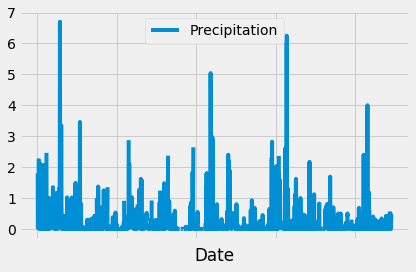

In [19]:
# Plotting precipitation data from 1 year ago

date = dt.date(2016, 8, 23)

#sel = [Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs]

sel = [Measurement.date, Measurement.prcp]

print(date)

# date = "2016-08-23"

result = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= date).all()

# get the count / length of the list of tuples
print(len(result))

df = pd.DataFrame(result, columns=['Date', 'Precipitation'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df.plot.line()
plt.tight_layout()
plt.show()
#plt.savefig("./Resources/date_vs_precipitation.png")

In [20]:
print(len(result))

2230


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?

session.query(Measurement.station).\
     group_by(Measurement.station).count()

9

In [23]:
# Querying for the most active stations (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

engine.execute('SELECT DISTINCT station, COUNT(id) FROM measurement GROUP BY station ORDER BY COUNT(id) DESC').fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Query for stations from the measurement table

session.query(Measurement.station).\
     group_by(Measurement.station).all()

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Query the dates of the last 12 months of the most active station
last_date = session.query(Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).first()[0]

print(last_date) 

2017-08-18


In [27]:
last_date_USC00519281 = dt.date(2017, 8 ,18)

last_year_USC00519281 = last_date_USC00519281 - dt.timedelta(days=365)
print(last_year_USC00519281)

2016-08-18


In [28]:
# SET UP HISTOGRAM QUERY AND PLOT

sel_two = [Measurement.tobs]
results_tobs_hist = session.query(*sel_two).\
    filter(Measurement.date >= last_year_USC00519281).\
    filter(Measurement.station == 'USC00519281').all()

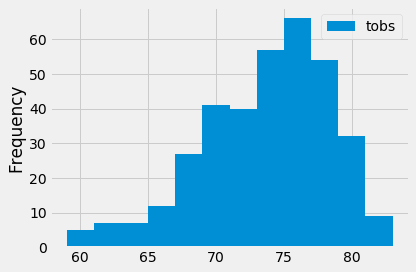

In [30]:
# HISTOGRAM Plot

df = pd.DataFrame(results_tobs_hist, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.show()
#plt.savefig("./Resources/histogram.png")

In [31]:
# Created a function called `calc_temps` that accepts a 'start date' and 'end date' in the format 'YYYY-MM-DD' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """Temp MIN,Temp AVG, and Temp MAX for a list of dates.
    
    Args are:
        start_date (string): A date string in the format YYYY-MM-DD
        end_date (string): A date string in the format YYYY-MM-DD
        
    Returns:
        T-MIN, T-AVG, and T-MAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


print(calc_temps('2017-08-01', '2017-08-07'))

[(72.0, 79.25, 83.0)]
